<a href="https://colab.research.google.com/github/luizfsjunior/data-science/blob/main/Projeto_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
base = pd.read_csv('iris.csv')

In [ ]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


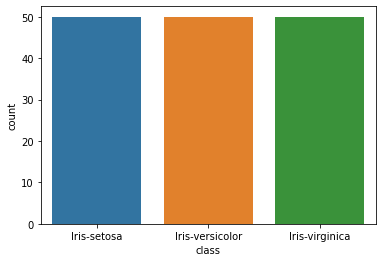

In [ ]:
sns.countplot(base['class'])

In [ ]:
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values

In [ ]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size =0.25)

In [ ]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape


((112, 4), (38, 4), (112,), (38,))

In [ ]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype = torch.long)

In [ ]:
classificador = nn.Sequential(
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,3)
    

)

In [ ]:
criterion = nn.CrossEntropyLoss()
optim = optim.Adam(classificador.parameters(), lr = 0.001, weight_decay=0.0001)

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

In [ ]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data

    optim.zero_grad()

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1) 

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optim.step()
    running_loss += loss.item()

  print('Época %3d: perda %.5f - accuracy %.5f' % (epoch + 1 , running_loss/len(train_loader), running_accuracy/len(train_loader)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Época   1: perda 0.04202 - accuracy 0.99167
Época   2: perda 0.02769 - accuracy 0.99167
Época   3: perda 0.09306 - accuracy 0.95833
Época   4: perda 0.03161 - accuracy 0.98333
Época   5: perda 0.03767 - accuracy 0.98333
Época   6: perda 0.02876 - accuracy 0.99167
Época   7: perda 0.04016 - accuracy 0.99167
Época   8: perda 0.04068 - accuracy 0.99167
Época   9: perda 0.02796 - accuracy 0.99167
Época  10: perda 0.02966 - accuracy 0.99167
Época  11: perda 0.02842 - accuracy 0.99167
Época  12: perda 0.02927 - accuracy 0.99167
Época  13: perda 0.02979 - accuracy 0.99167
Época  14: perda 0.03584 - accuracy 0.99167
Época  15: perda 0.03039 - accuracy 0.99167
Época  16: perda 0.02991 - accuracy 0.99167
Época  17: perda 0.02832 - accuracy 0.99167
Época  18: perda 0.02850 - accuracy 0.99167
Época  19: perda 0.02976 - accuracy 0.99167
Época  20: perda 0.03157 - accuracy 0.99167
Época  21: perda 0.02835 - accuracy 0.99167
Época  22: perda 0.03203 - accuracy 0.99167
Época  23: perda 0.02931 - accur

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)
previsoes = classificador(previsores_teste)


In [ ]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]

In [ ]:
previsoes

[1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0]

In [ ]:
matriz = confusion_matrix(previsoes, classe_teste)

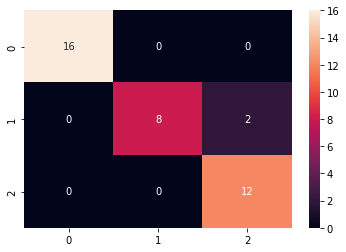

In [ ]:
sns.heatmap(matriz, annot=True)